# Fitting a polynomial

This example demonstrates computing a polynomial fit to 1D data from an Iris cube, adding the fit to the cube's metadata, and plotting both the 1D data and the fit.

Note that this example requires the package nc-time-axis to be installed, which is used under the hood by the plotting routines when using a non-Gregorian calendar.

Load some test data.

In [1]:
import iris

path = iris.sample_data_path('A1B_north_america.nc')
cube = iris.load_cube(path)

Extract a single time series at a latitude and longitude point.

In [2]:
location = next(cube.slices(['time']))

Calculate a polynomial fit to the data at this time series.

In [3]:
import numpy as np

x_points = location.coord('time').points
y_points = location.data
degree = 2

p = np.polyfit(x_points, y_points, degree)
y_fitted = np.polyval(p, x_points)

Add the polynomial fit values to the time series to take full advantage of Iris plotting functionality.

In [4]:
long_name = 'degree_{}_polynomial_fit_of_{}'.format(degree, cube.name())
fit = iris.coords.AuxCoord(y_fitted, long_name=long_name,
                           units=location.units)
location.add_aux_coord(fit, 0)

Text(0.5,1,'Trend of US air temperature over time')

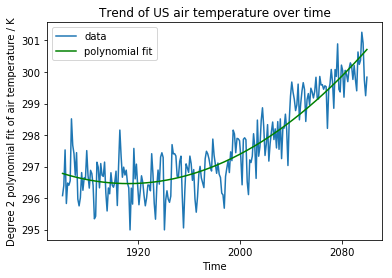

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import iris.quickplot as qplt

qplt.plot(location.coord('time'), location, label='data')
qplt.plot(location.coord('time'),
          location.coord(long_name),
          'g-', label='polynomial fit')
plt.legend(loc='best')
plt.title('Trend of US air temperature over time')